# Differentiation Project
### Continuous or discrete? Comparing models of cellular differentiation
File: Framework_Discrete_to_continuous.ipynb <br>
Author: Valentin Jacot-Descombes and Peter Ashcroft <br>
E-mail: vjd.jako@gmail.com

In [1]:
# 1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fenics import *
from mshr import *
from ufl import nabla_grad, nabla_div, grad
from scipy.interpolate import interp2d
import os
import sys
sys.path.append(os.path.realpath('..'))

%matplotlib notebook

In [2]:
# 2
nu = 0.1
cDiff = 0.0027
dbar = 1.6925
cS = 0.5
N = 40*3 # Dimension of the grid
M = 100 # Dimension of the matrices
xmax = 1
tol = 1e-6


In [3]:
# 3
def fun(x, y, muX, muY, sigma):
    return gaussian2d(x, y, muX, muY, sigma, sigma)


def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


def gaussian2d(x, y, muX, muY, sigmaX, sigmaY):
    return 1 / (sigmaX * sigmaY * np.sqrt(2 * np.pi)) * np.exp(
        -0.5 * (((x - muX) / sigmaX) ** 2 + ((y - muY) / sigmaY) ** 2))

# N: dimension to, M: dimension from
def interpMat2(N, M, mat):
    xx = np.arange(0, 1.0, 1/(N+1))
    yy = np.arange(0, 1.0, 1/(N+1))
    x = np.arange(0, 1.0, 1/M)
    y = np.arange(0, 1.0, 1/M)
    f = interp2d(x,y,mat)
    mat = f(xx,yy)
    mat = mat.T
    mat = mat.reshape(np.prod(mat.shape))
    return mat

# r = Expression('1 + pow(2, x[0])', degree=2)
# a = Expression('0.5 * (1 - x[0]/xmax)', degree=2, xmax=xmax)
# c_k = Expression('x[0]*x[0]', degree=2)


In [39]:
# 4
x = np.arange(0, 1.0, 1 / M)
y = np.arange(0, 1.0, 1 / M)
X, Y = np.meshgrid(x, y)
zs = np.array(-fun(np.ravel(X), np.ravel(Y), 0.2, 0.5, 0.15)) * 2
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.5, 0.3, 0.1)) *0.7
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.5, 0.7, 0.1))
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.8, 0.3, 0.1)) * 0.8
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.8, 0.7, 0.1)) * 1.1


[-0.05636114 -0.06146433 -0.06673266 ... -0.15437131 -0.12958597
 -0.10769815]
[0.99872896 0.99861387 0.99849506 ... 0.99651866 0.99707761 0.99757122]


<IPython.core.display.Javascript object>


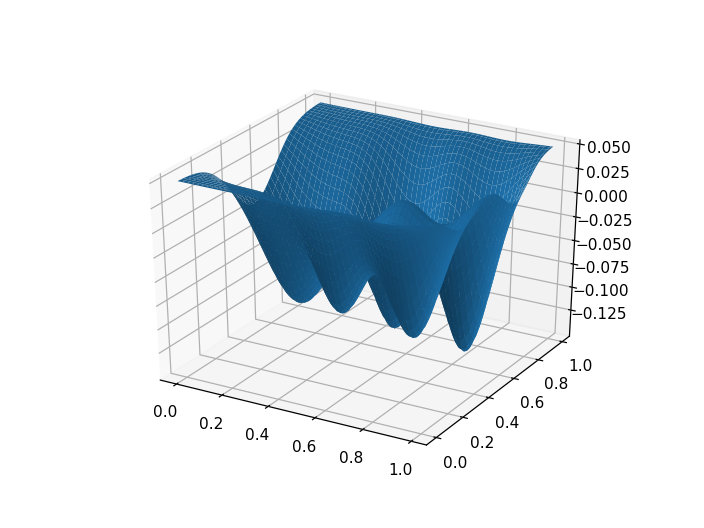

<IPython.core.display.Javascript object>


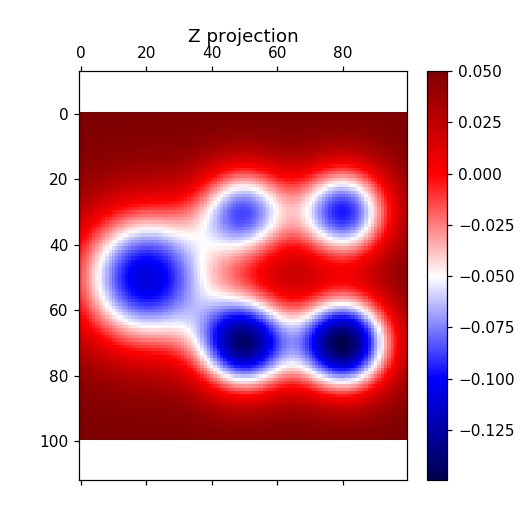

<IPython.core.display.Javascript object>


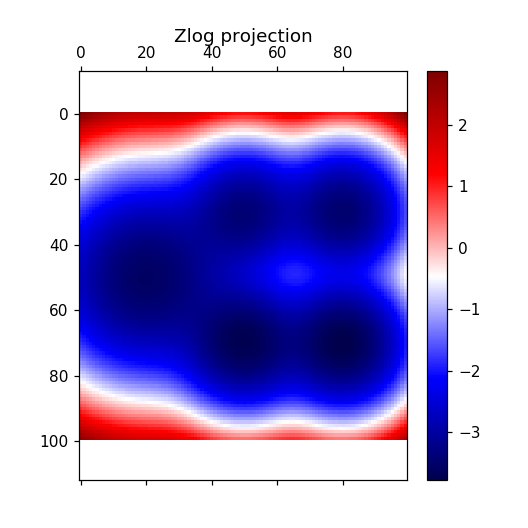

<IPython.core.display.Javascript object>


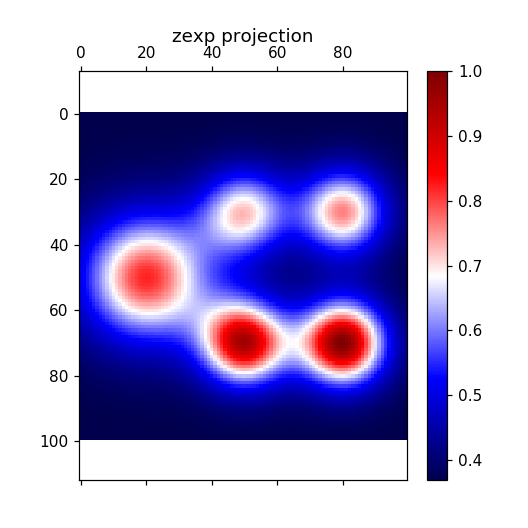

<IPython.core.display.Javascript object>


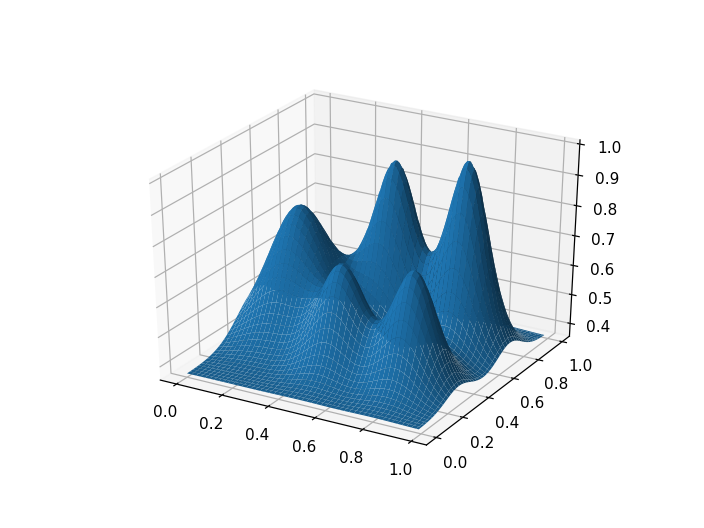

In [40]:
# 4
%matplotlib notebook
print(zs)
print((zs-min(zs))/-min(zs))
Z = (zs-max(zs))/-min(zs)
Z = Z.reshape(X.shape)*0.2
Z +=0.05
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.matshow(Z, aspect=1, cmap=plt.get_cmap('seismic'))
plt.title('Z projection')
plt.colorbar()
plt.axis('equal')
plt.show()

zlog = -np.log(np.abs(zs))
zlog = zlog.reshape(X.shape)
plt.matshow(zlog, aspect=1, cmap=plt.get_cmap('seismic'))
plt.title('Zlog projection')
plt.colorbar()
plt.axis('equal')
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, zlog)
zexp = np.exp(-((zs-min(zs))/-min(zs)))
zexp = zexp.reshape(X.shape)
plt.matshow(zexp, aspect=1, cmap=plt.get_cmap('seismic'))
plt.title('zexp projection')
plt.colorbar()
plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, zexp)



In [6]:
# 5
parameters['reorder_dofs_serial'] = False
mesh = UnitSquareMesh(N, N)  # 8X8 rectangles, each divided in 2 triangle, hence 128 cells, and 81 (9^2) vertices
Vhat = FunctionSpace(mesh, 'P', 1)  # P returns Lagrangian polynomials, 1 is the degree of the FE

<IPython.core.display.Javascript object>


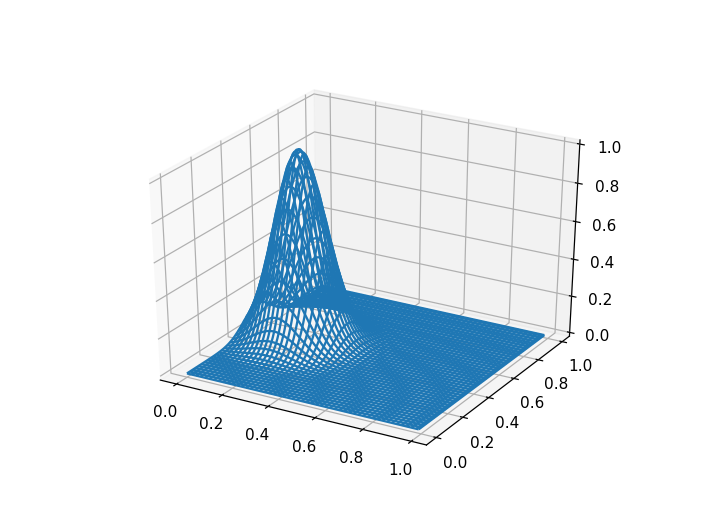

In [41]:
# 6
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 1.0, 1 / M)
y = np.arange(0, 1.0, 1 / M)
X, Y = np.meshgrid(x, y)
ui = np.array(fun(np.ravel(X), np.ravel(Y), 0.2, 0.5, 0.1))
ui = (ui-min(ui))/max(ui)
Ui = ui.reshape(X.shape)
# Z2 = z2.reshape(X.shape)
# ax.plot_surface(X, Y, Ui) 
# ax.plot_surface(X, Y, Z2, linewidth=1) 
ax.plot_wireframe(X, Y, Ui) 



## Class makeFunction(Vhat, N, M, mat): deprecated
One should use the functionFactory class instead of this one <br>
Vhat is the function space buit on the mesh<br>
N is the dimension of the mesh<br>
M is the dimension of the input matrix<br>
mat is the input matrix<br>
The function get_function returns the fencis function built from the input matrix

## Class functionFactory(Vhat, N, M)

Vhat is the function space buit on the mesh<br>
N is the dimension of the mesh<br>
M is the dimension of the input matrix<br>
The instance of the class can be directly evaluated by passing it a matrix, and the desired fenics function si returned.<br>
The function <i>plot(mat, title)</i> plots the function on the space.

In [8]:
# 6
from Dependencies.functionFactory import *
# from makeFunction import * 
factory = functionFactory(Vhat, N, M)

<IPython.core.display.Javascript object>


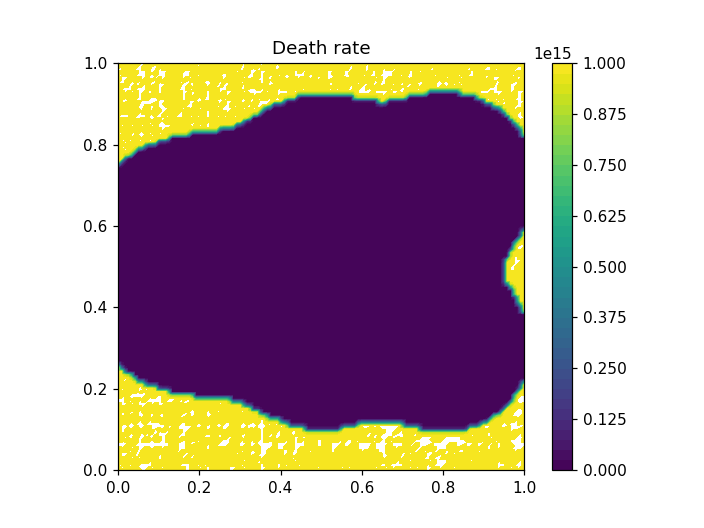

<IPython.core.display.Javascript object>


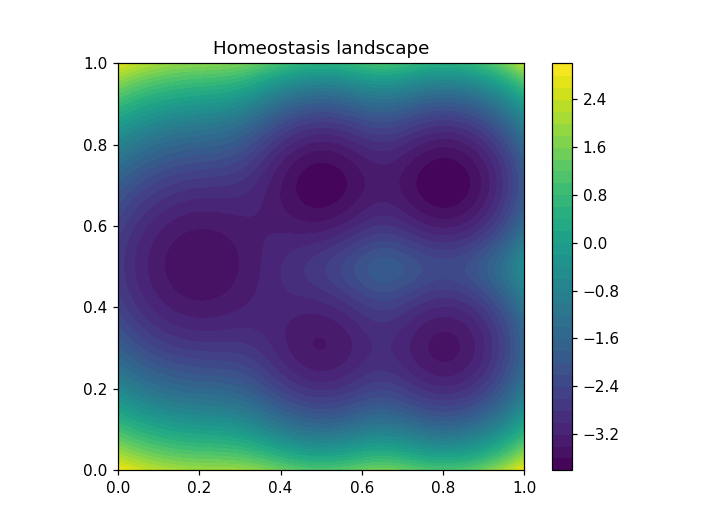

<IPython.core.display.Javascript object>


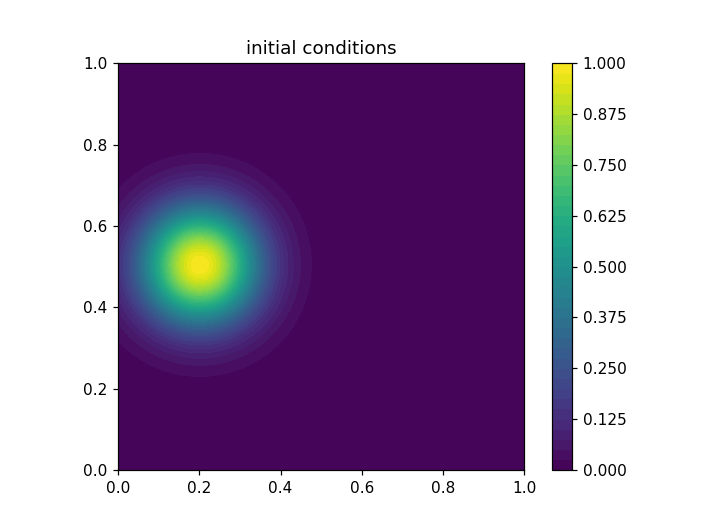

<IPython.core.display.Javascript object>


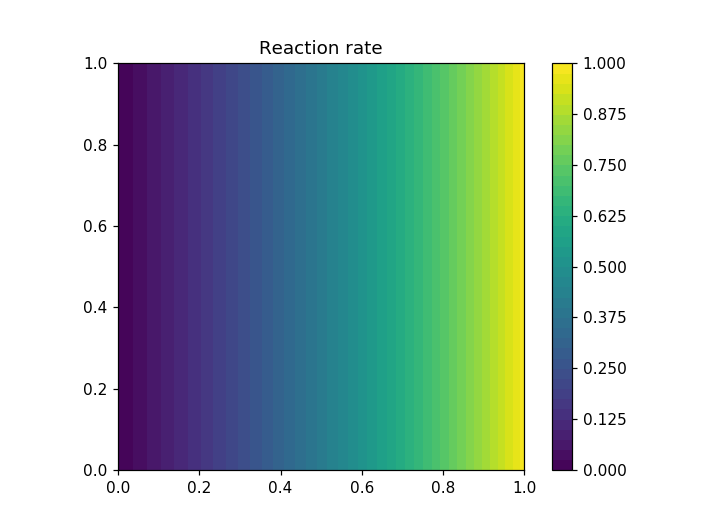

In [42]:
# 6
%matplotlib notebook
uhmst = zexp.reshape(X.shape)
uhmst[uhmst<0.4]=1e-15
cDth = 1. / uhmst.T
cDthFct = factory(cDth)
factory.plot(cDth, title='Death rate')

zlog = -np.log(np.abs(zs))
zlogFct = factory(zlog)
factory.plot(zlog,title='Homeostasis landscape')


# Very basic initial conditon
UiFct = factory(0.1*Ui.T)
factory.plot(Ui.T, title='initial conditions')

def rct(x_, y_):
    return -1 + 2**x_


cRctMat = np.array(rct(np.ravel(X), np.ravel(Y)))
cRctMat = cRctMat.reshape(X.shape)
cRctFct = factory(cRctMat.T)
factory.plot(cRctMat.T,title='Reaction rate')


In [44]:
# 6
def R1(u_):
    uv = u_.vector().get_local()
    cDth = cDthFct.vector().get_local()
    cRct = cRctFct.vector().get_local()
    temp = (cDth * uv)
    temp[temp > dbar] = dbar
    temp = (1 - temp)*cRct
    return temp


def v1():
    return zlogFct


def boundary(x, on_boundary):
    return on_boundary


# Differtiation rate
# Needs to be 1d --> np-ravel
def a(x_,y_):
    return 0.5*(1 - x_/max(x_))

# PT/ direction of the differentiation x-direction
def c_k_x(x_, y_):
    return x_**2


# PT/ direction of the differentiation, y-direction
def c_k_y(x_, y_):
    return 0*y_

<IPython.core.display.Javascript object>


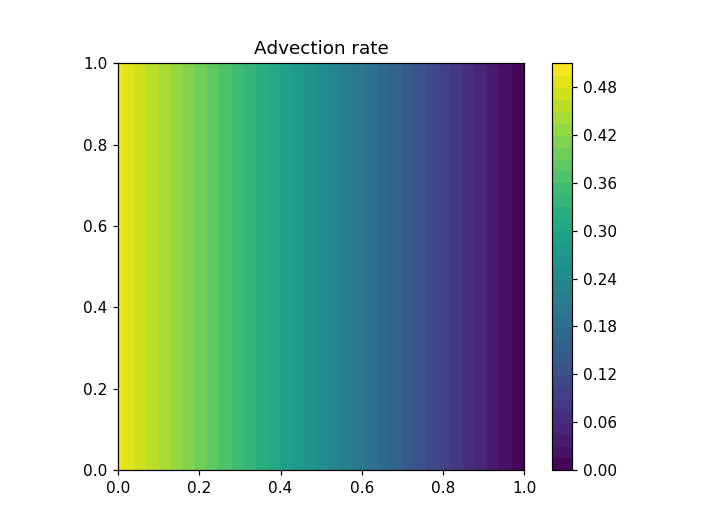

<IPython.core.display.Javascript object>


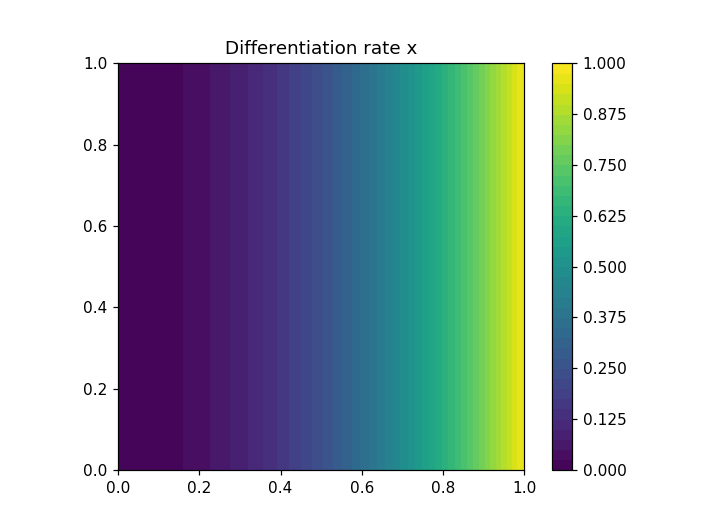

In [45]:
# 6
cAdvMat = np.array(a(np.ravel(X), np.ravel(Y)))
cAdvMat = cAdvMat.reshape(X.shape)
cAdvFct = factory(cAdvMat.T)
factory.plot(cAdvMat.T, title='Advection rate')

# # !! Y component in vector space
# cAMat = np.array(c_k_x(np.ravel(X), np.ravel(Y)))
# cAMat = cAMat.reshape(X.shape)
# cAFct = factory(cAMat.T)
# factory.plot(cAMat.T, title='Differentiation rate')
# factory.plot(cAMat.T*cAdvMat.T, title='Differentiation rate')

# def v2(u_):
# #     cAdv = cDthFct.vector().get_local()
#     cAdv = cAdvFct.vector().get_local()
#     cA = cAFct.vector().get_local()
#     cRct = cRctFct.vector().get_local()
#     return cA*(1-cAdv)*cRct

cAMat_x = np.array(c_k_x(np.ravel(X), np.ravel(Y)))
cAMat_x = cAMat_x.reshape(X.shape)
cAFct_x = factory(cAMat_x.T)
factory.plot(cAMat_x.T, title='Differentiation rate x')


cAMat_y = np.array(c_k_y(np.ravel(X), np.ravel(Y)))
cAMat_y = cAMat_y.reshape(Y.shape)
cAFct_y = factory(cAMat_y.T)
# factory.plot(cAMat_y.T, title='Differentiation rate y')
# factory.plot(cAMat.T*cAMat_y.T, title='Differentiation rate')

def v2_x(u_):
    cAdv = cAdvFct.vector().get_local()
    cA = cAFct_x.vector().get_local()
    cRct = cRctFct.vector().get_local()
    return cA*(1-cAdv)*cRct

def v2_y(u_):
    cAdv = cAdvFct.vector().get_local()
    cA = cAFct_y.vector().get_local()
    cRct = cRctFct.vector().get_local()
    return cA*(1-cAdv)*cRct

t = 0.40: difference = 0.24
t = 0.80: difference = 0.0725
t = 1.20: difference = 0.0714
t = 1.60: difference = 0.0724
t = 2.00: difference = 0.0889
t = 2.40: difference = 0.121
t = 2.80: difference = 0.154
t = 3.20: difference = 0.185
t = 3.60: difference = 0.205
t = 4.00: difference = 0.212
t = 4.40: difference = 0.203
t = 4.80: difference = 0.181
t = 5.20: difference = 0.152
t = 5.60: difference = 0.122
t = 6.00: difference = 0.119
t = 6.40: difference = 0.112
t = 6.80: difference = 0.0993
t = 7.20: difference = 0.0845
t = 7.60: difference = 0.0693
t = 8.00: difference = 0.0552
t = 8.40: difference = 0.0431
t = 8.80: difference = 0.035
t = 9.20: difference = 0.0319
t = 9.60: difference = 0.0291
t = 10.00: difference = 0.0267
t = 10.40: difference = 0.0245
t = 10.80: difference = 0.0226
t = 11.20: difference = 0.021
t = 11.60: difference = 0.0195
t = 12.00: difference = 0.0182
t = 12.40: difference = 0.0172
t = 12.80: difference = 0.0162
t = 13.20: difference = 0.0153
t = 13.60: diffe

<IPython.core.display.Javascript object>


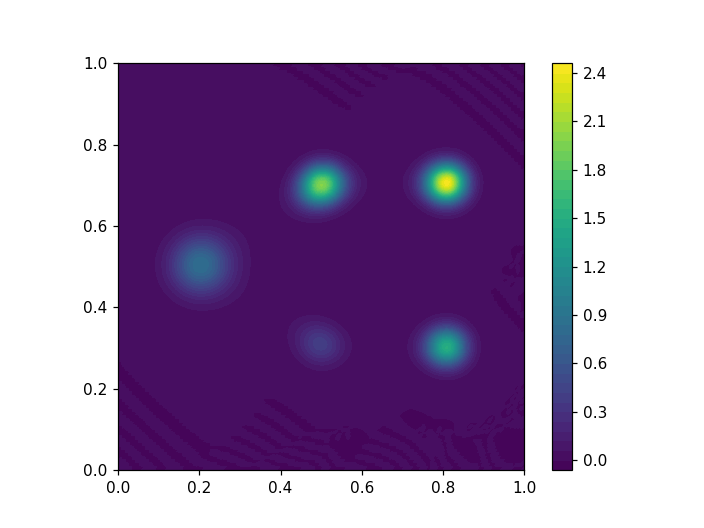

In [46]:
# 7
# %matplotlib notebook

zero = Constant(0)
bc = DirichletBC(Vhat, zero, boundary)

u = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
v = TestFunction(Vhat)
u_n = Function(Vhat)
R = Function(Vhat)
V2Fct_x = Function(Vhat) 
V2Fct_y = Function(Vhat) 

u_n = interpolate(UiFct, Vhat) # initial value

# plt.figure()
# p = plot(u_n)
# plt.colorbar(p)
# plt.show()

T = 80.0  # final time
num_step = 200
dt = T / num_step
k = 1./dt
tol = 1e-6

R.vector()[:] = R1(u_n)
V2Fct_x.vector()[:] = v2_x(u_n)
V2Fct_y.vector()[:] = v2_y(u_n)

F = dot((u-u_n)*k,v)*dx + nu * dot(grad(u), grad(v)) * dx + dot(nabla_grad(v1())*u, nabla_grad(v)) * dx - \
    dot( R*u, v) * dx - dot(V2Fct_x*u, v.dx(0))* dx - dot(V2Fct_y*u, v.dx(1))* dx
#F = dot((u-u_n)*k,v)*dx + nu * dot(grad(u), grad(v)) * dx + dot(nabla_grad(v1())*u, nabla_grad(v)) * dx - \
#    dot( R*u, v) * dx - dot(V2Fct*u, nabla_grad(v)) * dx
# - dot( v2(u), grad(v)) * dx
# - dot( R(u), v) * dx
# - dot( v2(u), grad(v)) * dx
# - dot( Adv(u), grad(v)) * dx
# dot(nabla_grad(zlogFct)*u, nabla_grad(v)) * dx

u = Function(Vhat)
a = lhs(F)
L = rhs(F)
t = 0

## uncomment to save the solution onto pvd files. Can be used to plot dynamically in paraview
# vtkfile = File('framework/solution.pvd')
# vtkfile << (u_n, t)

for n in range(num_step):
    R.vector()[:] = R1(u_n)
    V2Fct_x.vector()[:] = v2_x(u_n)
    V2Fct_y.vector()[:] = v2_y(u_n)
    t+=dt
    solve(a == L, u, bc)
    u_e = interpolate(u_n, Vhat)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('t = %.2f: difference = %.3g' % (t, error)) #relative errror
    if (error < tol):
        break
#     print(max(u.vector()))
#     print(min(u.vector()))
#     vtkfile << (u, t)
#     plt.figure()
#     p = plot(u)
#     plt.colorbar(p)
#     plt.show()
    u_n.assign(u)
    
# print(u.vector().get_local().shape)
# print(max(u.vector()))
# print(min(u.vector()))

plt.figure()
p = plot(u)
plt.colorbar(p)
plt.show()


t2 = 0.40: difference = 0.209
t2 = 0.80: difference = 0.177
t2 = 1.20: difference = 0.142
t2 = 1.60: difference = 0.11
t2 = 2.00: difference = 0.0871
t2 = 2.40: difference = 0.07
t2 = 2.80: difference = 0.057
t2 = 3.20: difference = 0.0469
t2 = 3.60: difference = 0.0387
t2 = 4.00: difference = 0.0337
t2 = 4.40: difference = 0.0299
t2 = 4.80: difference = 0.0266
t2 = 5.20: difference = 0.0238
t2 = 5.60: difference = 0.0214
t2 = 6.00: difference = 0.0195
t2 = 6.40: difference = 0.0179
t2 = 6.80: difference = 0.0165
t2 = 7.20: difference = 0.0153
t2 = 7.60: difference = 0.0142
t2 = 8.00: difference = 0.0132
t2 = 8.40: difference = 0.0123
t2 = 8.80: difference = 0.0115
t2 = 9.20: difference = 0.0108
t2 = 9.60: difference = 0.0102
t2 = 10.00: difference = 0.0096
t2 = 10.40: difference = 0.00906
t2 = 10.80: difference = 0.00858
t2 = 11.20: difference = 0.00812
t2 = 11.60: difference = 0.00769
t2 = 12.00: difference = 0.00728
t2 = 12.40: difference = 0.00689
t2 = 12.80: difference = 0.00651
t

<IPython.core.display.Javascript object>


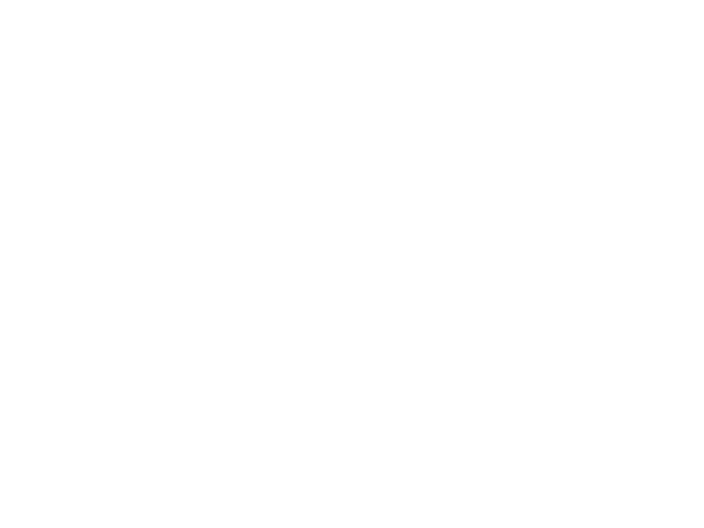

In [13]:
# 7, with half of the initial value, the system goes back to the steady state
# u = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
ui = Function(Vhat)

ui = interpolate(u, Vhat) # initial value
ui.vector()[:] = ui.vector()[:]*0.5

u_n = interpolate(ui, Vhat)

# plt.figure()
# p = plot(u_n)
# plt.colorbar(p)
# plt.show()

R.vector()[:] = R1(u_n)
V2Fct_x.vector()[:] = v2_x(u_n)
V2Fct_y.vector()[:] = v2_y(u_n)
u2 = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
F = dot((u2-u_n)*k,v)*dx + nu * dot(grad(u2), grad(v)) * dx + dot(nabla_grad(v1())*u2, nabla_grad(v)) * dx - \
    dot( R*u2, v) * dx - dot(V2Fct_x*u2, v.dx(0))* dx - dot(V2Fct_y*u, v.dx(1))* dx
#F = dot((u-u_n)*k,v)*dx + nu * dot(grad(u), grad(v)) * dx + dot(nabla_grad(v1())*u, nabla_grad(v)) * dx - \
#    dot( R*u, v) * dx - dot(V2Fct*u, nabla_grad(v)) * dx
# - dot( v2(u), grad(v)) * dx
# - dot( R(u), v) * dx
# - dot( v2(u), grad(v)) * dx
# - dot( Adv(u), grad(v)) * dx
# dot(nabla_grad(zlogFct)*u, nabla_grad(v)) * dx

u3 = Function(Vhat)
a = lhs(F)
L = rhs(F)
t2 = 0

## uncomment to save the solution onto pvd files. Can be used to plot dynamically in paraview
# vtkfile = File('framework/solution.pvd')
# vtkfile << (u_n, t)

for n in range(num_step):
    R.vector()[:] = R1(u_n)
    V2Fct_x.vector()[:] = v2_x(u_n)
    V2Fct_y.vector()[:] = v2_y(u_n)
    t2+=dt
    solve(a == L, u3, bc)
    u_e = interpolate(u_n, Vhat)
    error = np.abs(u_e.vector().get_local() - u3.vector().get_local()).max()
    print('t2 = %.2f: difference = %.3g' % (t2, error)) #relative errror
    if (error < tol):
        break
#     print(max(u.vector()))
#     print(min(u.vector()))
#     vtkfile << (u, t)
#     plt.figure()
#     p = plot(u)
#     plt.colorbar(p)
#     plt.show()
    u_n.assign(u3)
    
# print(u.vector().get_local().shape)
# print(max(u.vector()))
# print(min(u.vector()))

plt.figure()
p = plot(u3)
plt.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


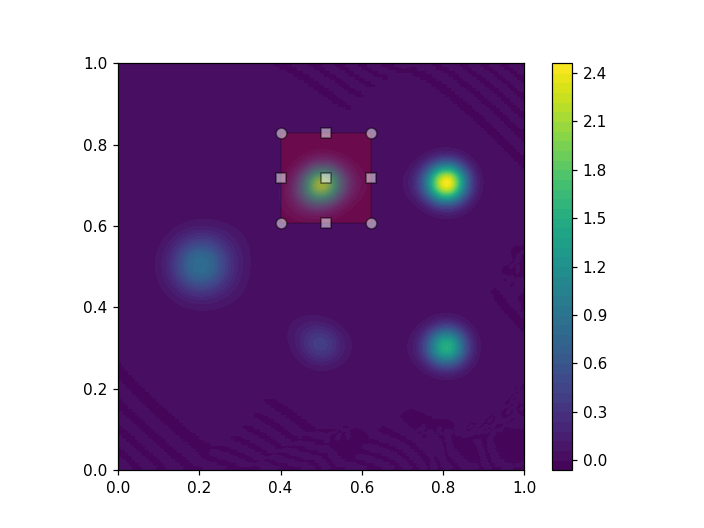


      click  -->  release


In [16]:
# 8
from matplotlib.widgets import RectangleSelector
def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))



fig, current_ax = plt.subplots()                 # make a new plotting range
# p = plot(UiFct)
p = plot(u)
plt.colorbar(p)
def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)

print("\n      click  -->  release")

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
plt.connect('key_press_event', toggle_selector)
plt.show()



In [17]:
# 8
# print(toggle_selector.RS.geometry)
x1, x2, y1 ,y2, z = toggle_selector.RS.geometry.T
# print(x1)
# print(x2)
# print(y1)
# print(y2)
p1 = Point(x1[1], x1[0])
p2 = Point(y1[1], y1[0])

NewMesh = RectangleMesh(p1,p2,N,N)
# plot(NewMesh)
VInt = FunctionSpace(NewMesh, "Lagrange", 2)
uInt = project(u, VInt)
print(assemble(uInt*dx))
# print(assemble(u*dx))
print(uInt.vector().get_local().max())
# print(assemble(uInt*ds))
# print(assemble(uInt*dx))

0.015736160120075615
1.99094621291326


## BIN CLASS (x,y,r,n,state)
This class builds an object that represents a square mesh around the coordinate (x,y) and of side length 2*r and 2*n triangles. This helps to calculate the needed parameters for the next steps. 
The function "integrate(u)" integrates the function u over the selected mesh.

The state of the object Bin.shape can be set to 'c' and the integration will be performed on a circle mesh based on the coordinate (x,y) and of radius r and consisting of 2*n triangles.

Remark: the circle shape is less precise, but with a higher number of degree of freedom, the correctness stands  

In [18]:
from Dependencies.Bin import *


<IPython.core.display.Javascript object>


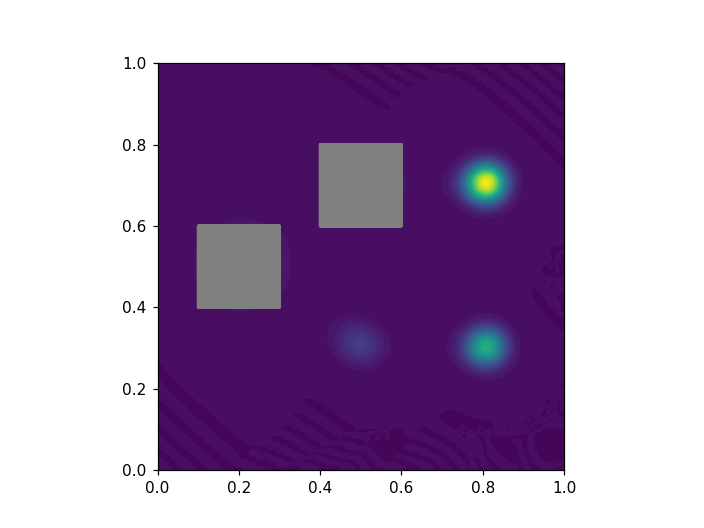

0.011790638043218598
0.01564123049206572


In [19]:
# test
plt.figure()
plot(u)
bin1 = Bin(0.2, 0.5, 0.1, N, '')
bin2 = Bin(0.5, 0.7, 0.1, N, '')
print(bin1.integrate(u))
print(bin2.integrate(u))
plot(bin1.mesh)
plot(bin2.mesh)

In [27]:
# demonstration of the lower and upper halfflows from the bin class
bin1.setState('s')
lower= bin1.lowerHalfOutflow(u)
upper= bin1.upperHalfOutflow(u)
print(lower)
print(upper)

print(lower+upper)
print(bin1.outflow(u))
print(lower+upper-bin1.outflow(u))

1.0520203600424884
1.2909079175778433
2.3429282776203317
2.3429282776203317
0.0


<IPython.core.display.Javascript object>


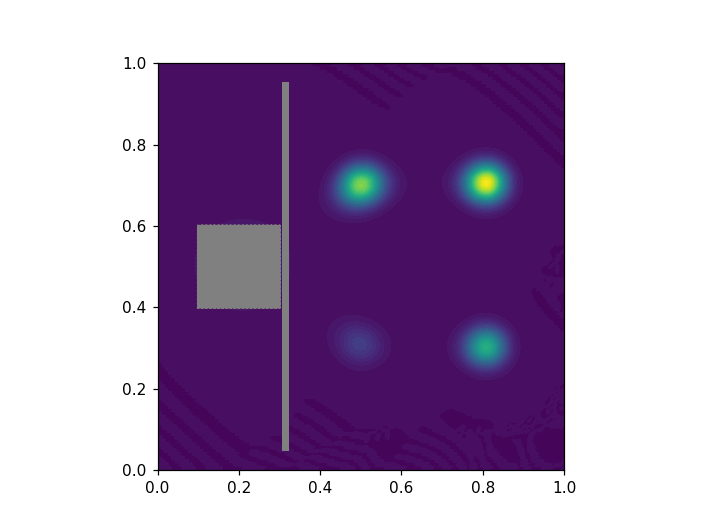

2.43728742423934
-0.10358932464230541


In [20]:
plt.figure()
plot(u)
upperMesh = RectangleMesh(Point(0.1, 0.6), Point(0.3, 0.4), 20, 20)
plot(upperMesh)
TestMesh = RectangleMesh(Point(0.31, 0.05), Point(0.32, 0.95), 80, 80)
plot(TestMesh)

VInt = FunctionSpace(upperMesh, "Lagrange", 2)
n = FacetNormal(upperMesh)
uOut = project(u, VInt)
flux = -dot(grad(uOut),n)*ds
print(assemble(flux))

def boundary_up(x, on_boundary):
    return on_boundary #and x[0] <= 0.31

VInt = FunctionSpace(TestMesh, "Lagrange", 2)
nUD = FacetNormal(TestMesh)
uUD = project(u, VInt)

bcUp = AutoSubDomain(boundary_up)
boundaries =  MeshFunction('size_t', TestMesh, TestMesh.topology().dim()-1)
dsUD = Measure('ds', domain = TestMesh, subdomain_data=boundaries)
bcUp.mark(boundaries, 1)
fluxU = -dot(grad(uUD), nUD) * dsUD(1)


print(assemble(fluxU))


In [21]:
print(bin1.maxValue(u))
print(bin1.minValue(u))
print(bin2.maxValue(u))
print(bin2.minValue(u))

0.8367611592204977
0.00718854953054347
1.9976902893829092
0.00021111735569902937


In [22]:
# test for bin1
p1_ = Point(0.1, 0.6)
p2_ = Point(0.3, 0.4)
NewMesh = RectangleMesh(p1_,p2_,N,N)        
# domain = Circle(Point(0.2,0.5),0.1)
# NewMesh = generate_mesh(domain, 2*N)
VInt = FunctionSpace(NewMesh, "Lagrange", 2)
n = FacetNormal(NewMesh)
uOut = project(u, VInt)
flux = -dot(grad(uOut),n)*ds
print(assemble(flux))
# print(upper/assemble(flux))

2.3429282776203473


In [ ]:
# Calculates the fraction of outflow that flows throgh the back of the stem-cells bins. 
# The fraction is stored in the variable Cfwd
def boundary_down(x, on_boundary):
    return on_boundary and x[0] <= 0.11

def boundary_up(x, on_boundary):
    return on_boundary and x[0] >= 0.1


VInt = FunctionSpace(NewMesh, "Lagrange", 2)
nUD = FacetNormal(NewMesh)
uUD = project(u, VInt)

bcUp = AutoSubDomain(boundary_up)
bcDown = AutoSubDomain(boundary_down)

boundaries =  MeshFunction('size_t', NewMesh, NewMesh.topology().dim()-1)
dsUD = Measure('ds', domain = NewMesh, subdomain_data=boundaries)
bcUp.mark(boundaries, 1)
bcDown.mark(boundaries, 2)

fluxU = -dot(grad(uUD), nUD) * dsUD(1)
fluxL = -dot(grad(uUD), nUD) * dsUD(2)
upper = assemble(fluxU)
lower = assemble(fluxL)

print(upper)
print(lower)
print(upper + lower)
# print(bin1.outflow(u))
print(upper/assemble(flux))
Cfwd = upper/assemble(flux)

In [23]:
bin1 = Bin(0.2, 0.5, 0.1, N, '')
bin2 = Bin(0.5, 0.7, 0.1, N, '')
bin3 = Bin(0.8, 0.7, 0.1, N, '')
bin4 = Bin(0.5, 0.3, 0.1, N, '')
bin5 = Bin(0.8, 0.3, 0.1, N, '')
u1= bin1.integrate(u)
u2= bin2.integrate(u)
u3= bin3.integrate(u)
u4= bin4.integrate(u)
u5= bin5.integrate(u)
U_cont = [u1,u2,u3,u4,u5]
print(U_cont)

[0.011790638043218598, 0.01564123049206572, 0.016893825649570253, 0.003323671542554212, 0.010407025438881373]


In [24]:
# Single small time step applied to the function in order to try and compute the outflow
R.vector()[:] = 0
V2Fct_x.vector()[:] = v2_x(u_n)
#     V2Fct_y.vector()[:] = v2_y(u_n)
u_t = TrialFunction(Vhat)

# dt = dt/10.
# k = 1./dt

F = dot((u_t-u_n)*k,v)*dx + nu * dot(grad(u_t), grad(v)) * dx + dot(nabla_grad(v1())*u_t, nabla_grad(v)) * dx - \
    dot( R*u_t, v) * dx - dot(V2Fct_x*u_t, v.dx(0))* dx - dot(Constant(0), v.dx(1))* dx
# t = 0
u_t = Function(Vhat)

a = lhs(F)
L = rhs(F)

solve(a == L, u_t, bc)
print((bin1.integrate(u_n-u_t))/dt)
R.vector()[:] = R1(u_n)
print(bin1.integrate(R*u_n))
g1 = (bin1.integrate(u_n-u_t)/dt) /u1
g2 = (bin2.integrate(u_n-u_t)/dt) /u2
g3 = (bin3.integrate(u_n-u_t)/dt) /u3
g4 = (bin4.integrate(u_n-u_t)/dt) /u4
g5 = (bin5.integrate(u_n-u_t)/dt) /u5
print(g1)
print(g2)
print(g3)
print(g4)
print(g5)

0.000926635448366793
0.0007623892495971831
0.0785907806660004
-0.005670446804602966
-0.10507525074237953
0.2369627868544127
0.007653707676076284


<IPython.core.display.Javascript object>


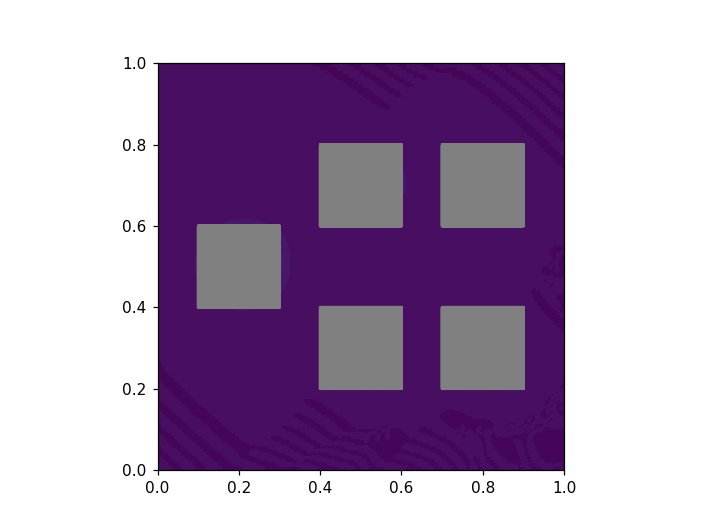

0.011790638043218598
0.01564123049206572


In [25]:
# Example of the definitions of several bins, and plotting of their respective mesh on the last generated figure
plt.figure()
plot(u)
bin1 = Bin(0.2, 0.5, 0.1, N, '')
print(bin1.integrate(u))
plot(bin1.mesh)
bin2 = Bin(0.5, 0.7, 0.1, N, '')
print(bin2.integrate(u))
plot(bin2.mesh)
plot(bin3.mesh)
plot(bin4.mesh)
plot(bin5.mesh)
bin2.setState('s')

In [26]:
d1= bin1.normedIntegral(cRctFct*cDthFct,u)
d2= bin2.normedIntegral(cRctFct*cDthFct,u)
d3= bin3.normedIntegral(cRctFct*cDthFct,u)
d4= bin4.normedIntegral(cRctFct*cDthFct,u)
d5= bin5.normedIntegral(cRctFct*cDthFct,u)


In [28]:
# alternative way of calculating the outflow
# @depecated
Cfwd = 0.8
g1= Cfwd*bin1.outflow(u)/u1
g2= bin2.outflow(u)/u2
g3= bin3.outflow(u)/u3
g4= bin4.outflow(u)/u4
g5= bin5.outflow(u)/u5
print(g1)

158.9687186754322


In [29]:
r1= bin1.normedIntegral(cRctFct,u)
r2= bin2.normedIntegral(cRctFct,u)
r3= bin3.normedIntegral(cRctFct,u)
r4= bin4.normedIntegral(cRctFct,u)
r5= bin5.normedIntegral(cRctFct,u)

In [30]:
R.vector()[:] = R1(u)
r1= bin1.normedIntegral(R,u)
r2= bin2.normedIntegral(R,u)
r3= bin3.normedIntegral(R,u)
r4= bin4.normedIntegral(R,u)
r5= bin5.normedIntegral(R,u)
d1= 0
d2= 0
d3= 0
d4= 0
d5= 0

In [31]:
c12 = bin1.upperHalfOutflow(u) / bin1.outflow(u)
c14 = bin1.lowerHalfOutflow(u) / bin1.outflow(u)
c23 = 1
c45 = 1


In [32]:
from scipy.integrate import odeint

In [33]:
print(r1)
print(r1*(min(0.0111597/u1,dbar)))
print(g1)
print(r1-g1-r1*(min(0.0111597/u1,dbar)))

0.0646605463813281
0.061200445370870486
158.9687186754322
-158.96525857442174


In [34]:
# perturbed discrete system
R.vector()[:] = R1(u)
# r1= bin1.normedIntegral(R,u)
# r2= bin2.normedIntegral(R,u)
# r3= bin3.normedIntegral(R,u)
# r4= bin4.normedIntegral(R,u)
# r5= bin5.normedIntegral(R,u)
# d1= 0
# d2= 0
# d3= 0
# d4= 0
# d5= 0
r1= bin1.normedIntegral(cRctFct,u)
r2= bin2.normedIntegral(cRctFct,u)
r3= bin3.normedIntegral(cRctFct,u)
r4= bin4.normedIntegral(cRctFct,u)
r5= bin5.normedIntegral(cRctFct,u)

A = np.array(
    [[(r1 - g1 - d1), 0, 0, 0, 0],
     [c12*g1, r2 - g2 - d2, 0, 0, 0],
     [0, c23*g2, r3 - g3 - d3, 0, 0], 
     [c14*g1, 0, 0, r4 - g4 - d4, 0],
     [0, 0, 0, c45*g4, r5 - g5 - d5]] )
print(A)

def pend(y, t):
    d1= r1*(min(y[0]/u1,dbar))
    d2= r2*(min(y[1]/u2,dbar))
    d3= r3*(min(y[2]/u3,dbar))
    d4= r4*(min(y[3]/u4,dbar))
    d5= r5*(min(y[4]/u5,dbar))
    dydt = np.zeros((5))
    dydt[0] = (r1 - g1 - d1)* y[0]
    dydt[1] = c12*g1*y[0] + (r2 -g2 - d2)*y[1]
    dydt[2] = c23*g2*y[1] + (r3 -g3 - d3)*y[2]
    dydt[3] = c14*g1*y[0] + ( r4 -g4 - d4)*y[3]
    dydt[4] = c45*g4*y[3] + (r5 -g5 - d5)*y[4]
    return dydt

# print(A)
t = np.linspace(0, 400, 10)
ui = np.array(U_cont)*0.5
print(np.array(odeint(pend, ui, t)))
print(np.array(U_cont))

[[-158.81690781    0.            0.            0.            0.        ]
 [  87.58867249  -90.0743056     0.            0.            0.        ]
 [   0.           90.48555345  -69.37912219    0.            0.        ]
 [  71.38004618    0.            0.         -113.93262363    0.        ]
 [   0.            0.            0.          114.33926141  -68.2222291 ]]
[[ 5.89531902e-03  7.82061525e-03  8.44691282e-03  1.66183577e-03
   5.20351272e-03]
 [-3.44523789e-26 -3.02903121e-25 -1.11719062e-21  5.86421491e-26
  -4.73331519e-22]
 [-6.09378553e-30 -1.00363466e-28 -4.74880398e-25  1.06405746e-29
  -1.92186650e-25]
 [-5.30789292e-30 -8.74201617e-29 -4.13637590e-25  9.26830059e-30
  -1.67401183e-25]
 [-4.52200031e-30 -7.44768576e-29 -3.52394782e-25  7.89602659e-30
  -1.42615716e-25]
 [-3.73610770e-30 -6.15335535e-29 -2.91151974e-25  6.52375259e-30
  -1.17830249e-25]
 [-2.95021509e-30 -4.85902494e-29 -2.29909167e-25  5.15147860e-30
  -9.30447822e-26]
 [-2.16432248e-30 -3.56469453e-29 -1.68

In [35]:
# Linear system solved while fixing the value of u1 to solve the under determined system
A = np.array(
    [[r2 -g2 - d2, 0, 0, 0],
     [c23*g2, r3 -g3 - d3, 0, 0], 
     [ 0, 0, r4 -g4 - d4, 0],
     [ 0, 0, c45*g4, r5 -g5 - d5]] )

print(A)
B = np.array([-c12*g1,0, -c14*g1,0])*u1
print(B)
Y = np.linalg.solve(A,B)
u_dis=np.array([u1,Y[0],Y[1],Y[2],Y[3]])
print(u_dis)
print(np.array(U_cont))
print((u_dis - U_cont)/u1)
print(sum(u_dis - U_cont)/u1)

[[ -90.0743056     0.            0.            0.        ]
 [  90.48555345  -69.37912219    0.            0.        ]
 [   0.            0.         -113.93262363    0.        ]
 [   0.            0.          114.33926141  -68.2222291 ]]
[-1.03272633  0.         -0.84161629  0.        ]
[0.01179064 0.01146527 0.01495322 0.00738696 0.01238042]
[0.01179064 0.01564123 0.01689383 0.00332367 0.01040703]
[ 0.         -0.35417586 -0.16458854  0.34462031  0.16736994]
-0.006774151785453949


In [36]:
# results with square bins, with different values set for Cfwd
u_discrete   = np.array([0.02135671, 0.02528015, 0.0242839 , 0.01695185, 0.01983207]) #1.0
u_discrete80 = np.array([0.02135671, 0.02015552, 0.01928101, 0.01353324, 0.01577899]) #0.8
u_discrete70 = np.array([0.02135671, 0.01763608, 0.01687088, 0.01184159, 0.01380661]) #0.7
u_discrete65 = np.array([0.02135671, 0.01637636, 0.01566582, 0.01099576, 0.01282043]) #0.65
# u_discrete60 = np.array([0.02135671, 0.0188958 , 0.01807594, 0.01268742, 0.01479280]) #0.60
u_cont       = np.array([0.02135671, 0.01549561, 0.01648316, 0.00942607, 0.01223918]) #Goal

print(u_discrete-u_cont)
print((u_discrete-u_cont).sum() / 0.02135671)
print(u_discrete80-u_cont)
print((u_discrete80-u_cont).sum()/ 0.02135671)
print(u_discrete70-u_cont)
print((u_discrete70-u_cont).sum()/ 0.02135671)
print(u_discrete65-u_cont)
print((u_discrete65-u_cont).sum()/ 0.02135671)
# print(u_discrete60-u_cont)
# print((u_discrete60-u_cont).sum()/ 0.02135671)

[0.         0.00978454 0.00780074 0.00752578 0.00759289]
1.5313196648734755
[0.         0.00465991 0.00279785 0.00410717 0.00353981]
0.7072596855976412
[0.         0.00214047 0.00038772 0.00241552 0.00156743]
0.30487561052240725
[ 0.          0.00088075 -0.00081734  0.00156969  0.00058125]
0.10368404122170503


In [37]:
# results with circle bins
u_discrete   = np.array([0.02017155, 0.02004976, 0.01864126, 0.01479906, 0.01587663]) #1.0
u_discrete80 = np.array([0.02017155, 0.01603981, 0.014913  , 0.01183925, 0.0127013 ]) #0.8
u_discrete75 = np.array([0.02017155, 0.01503732, 0.01398094, 0.0110993 , 0.01190747]) #0.75
u_discrete70 = np.array([0.02017155, 0.01403483, 0.01304888, 0.01035934, 0.01111364]) #0.7
u_discrete65 = np.array([0.02017155, 0.01303234, 0.01211682, 0.00961939, 0.01031981]) #0.65
u_cont       = np.array([0.02017155, 0.01526664, 0.01630996, 0.00920873, 0.0121138 ]) #Goal

print(u_discrete-u_cont)
print((u_discrete-u_cont).sum()/0.02017155)
print(u_discrete80-u_cont)
print((u_discrete80-u_cont).sum()/0.02017155)
print(u_discrete75-u_cont)
print(abs((u_discrete75-u_cont).sum()/0.02017155))
print(u_discrete70-u_cont)
print(abs((u_discrete70-u_cont).sum()/0.02017155))
print(u_discrete65-u_cont)
print(abs((u_discrete65-u_cont).sum()/0.02017155))

[0.         0.00478312 0.0023313  0.00559033 0.00376283]
0.8163765303112553
[ 0.          0.00077317 -0.00139696  0.00263052  0.0005875 ]
0.12860836177685922
[ 0.         -0.00022932 -0.00232902  0.00189057 -0.00020633]
0.04333330854594701
[ 0.         -0.00123181 -0.00326108  0.00115061 -0.00100016]
0.21527547461647706
[ 0.         -0.0022343  -0.00419314  0.00041066 -0.00179399]
0.3872171449392831
